In [1]:
library(tidyverse) ## basics
library(lme4) ## linear mixed effect models
library(afex) ## p values for lme4
library(ggpubr) ## combining multiple graphs
library(MDMR) ## multivariate distance matrix regression
library(cowplot)

── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


************
Welcome to afex. For support vi

In [2]:
# load metadata
metadata <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/metadata.tsv", sep='\t')

# load alpha diversity
shannon <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/shannon_tabulated.tsv", sep='\t')
faith <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/faith_pd_tabulated.tsv", sep='\t')
asv <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/observed_features_tabulated.tsv", sep='\t')
chao1 <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/alpha/chao1_tabulated.tsv", sep='\t')

# rename SampleID column
shannon <- rename(shannon, SampleID=X)
faith <- rename(faith, SampleID=X)
asv <- rename(asv, SampleID=X)
chao1 <- rename(chao1, SampleID=X)

# merge alpha diversity with metadata
metadata <- merge(metadata,shannon, by = c("SampleID"))
metadata <- merge(metadata,chao1, by = c("SampleID"))
metadata <- merge(metadata,asv, by = c("SampleID"))
metadata <- merge(metadata,faith, by = c("SampleID"))


In [3]:
# subsample the dataset
metadata_g3 <- filter(metadata, Genotype=="KO" | Genotype=="WT" | Genotype=="KO_IL17")
metadata_g2a <- filter(metadata, Genotype=="KO" | Genotype=="WT")
metadata_g2b <- filter(metadata, Genotype=="KO" | Genotype=="KO_IL17")
metadata_g2c <- filter(metadata, Genotype=="WT" | Genotype=="KO_IL17")


## Alpha diversity

In [4]:
# model for IBD alpha div ~ genotype 3 categories
model1sh <- lmer(shannon_entropy~Genotype+(1|Litter),data=metadata_g3)
summary(model1sh)
model1ch <- lmer(chao1~Genotype+(1|Litter),data=metadata_g3)
summary(model1ch)
model1as <- lmer(observed_features~Genotype+(1|Litter),data=metadata_g3)
summary(model1as)
model1fa <- lmer(faith_pd~Genotype+(1|Litter),data=metadata_g3)
summary(model1fa)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: shannon_entropy ~ Genotype + (1 | Litter)
   Data: metadata_g3

REML criterion at convergence: 66.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2235 -0.4294 -0.0022  0.3361  2.3148 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 1.8052   1.344   
 Residual             0.2948   0.543   
Number of obs: 33, groups:  Litter, 4

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)  
(Intercept)       3.3293     0.6874  3.1518   4.843   0.0150 *
GenotypeKO_IL17   0.8419     0.3290 27.4982   2.559   0.0163 *
GenotypeWT        0.3532     0.2095 27.0225   1.686   0.1034  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) GKO_IL
GntyKO_IL17 -0.101       
GenotypeWT  -0.147  0.318

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: chao1 ~ Genotype + (1 | Litter)
   Data: metadata_g3

REML criterion at convergence: 265.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8245 -0.5480 -0.2065  0.3509  3.4205 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 250.9    15.84   
 Residual             262.6    16.21   
Number of obs: 33, groups:  Litter, 4

Fixed effects:
                Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)       34.924      9.037  3.904   3.865   0.0189 *
GenotypeKO_IL17    5.716      9.608 29.327   0.595   0.5564  
GenotypeWT         1.746      6.253 27.120   0.279   0.7822  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) GKO_IL
GntyKO_IL17 -0.232       
GenotypeWT  -0.334  0.324

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: observed_features ~ Genotype + (1 | Litter)
   Data: metadata_g3

REML criterion at convergence: 244.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8854 -0.6202 -0.1275  0.4311  2.4853 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 217.9    14.76   
 Residual             125.7    11.21   
Number of obs: 33, groups:  Litter, 4

Fixed effects:
                Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)       30.468      7.971  3.515   3.822   0.0237 *
GenotypeKO_IL17    6.813      6.720 28.526   1.014   0.3192  
GenotypeWT         3.264      4.326 27.070   0.754   0.4571  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) GKO_IL
GntyKO_IL17 -0.181       
GenotypeWT  -0.262  0.321

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: faith_pd ~ Genotype + (1 | Litter)
   Data: metadata_g3

REML criterion at convergence: 102.6

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.83932 -0.51242 -0.07716  0.52463  2.03871 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 1.139    1.067   
 Residual             1.158    1.076   
Number of obs: 33, groups:  Litter, 4

Fixed effects:
                Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)      7.54968    0.60684  3.85908  12.441 0.000295 ***
GenotypeKO_IL17  0.09783    0.63853 29.28247   0.153 0.879287    
GenotypeWT       0.16162    0.41527 27.10102   0.389 0.700180    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) GKO_IL
GntyKO_IL17 -0.229       
GenotypeWT  -0.330  0.323

In [5]:
# model for IBD alpha div ~ genotype 2 categories (WT vs KO)
model2ash <- lmer(shannon_entropy~Genotype+(1|Litter),data=metadata_g2a)
summary(model2ash)
model2ach <- lmer(chao1~Genotype+(1|Litter),data=metadata_g2a)
summary(model2ach)
model2aas <- lmer(observed_features~Genotype+(1|Litter),data=metadata_g2a)
summary(model2aas)
model2afa <- lmer(faith_pd~Genotype+(1|Litter),data=metadata_g2a)
summary(model2afa)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: shannon_entropy ~ Genotype + (1 | Litter)
   Data: metadata_g2a

REML criterion at convergence: 60.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.02310 -0.60806  0.01016  0.38287  2.11206 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 1.7983   1.3410  
 Residual             0.3551   0.5959  
Number of obs: 27, groups:  Litter, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)  
(Intercept)   3.3290     0.6894  3.1830   4.829   0.0147 *
GenotypeWT    0.3528     0.2300 22.0259   1.534   0.1392  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GenotypeWT -0.161

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: chao1 ~ Genotype + (1 | Litter)
   Data: metadata_g2a

REML criterion at convergence: 225.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6499 -0.5543 -0.3186  0.3304  3.1172 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 244.5    15.64   
 Residual             317.9    17.83   
Number of obs: 27, groups:  Litter, 4

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)   34.914      9.167  4.097   3.809   0.0181 *
GenotypeWT     1.711      6.879 22.138   0.249   0.8059  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GenotypeWT -0.362

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: observed_features ~ Genotype + (1 | Litter)
   Data: metadata_g2a

REML criterion at convergence: 208.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7148 -0.5945 -0.2699  0.5296  2.2613 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 214.9    14.66   
 Residual             151.9    12.32   
Number of obs: 27, groups:  Litter, 4

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)   30.466      8.042  3.624   3.789   0.0231 *
GenotypeWT     3.244      4.755 22.081   0.682   0.5022  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GenotypeWT -0.285

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: faith_pd ~ Genotype + (1 | Litter)
   Data: metadata_g2a

REML criterion at convergence: 89.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.70373 -0.69548 -0.05345  0.51909  1.87853 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 1.115    1.056   
 Residual             1.358    1.165   
Number of obs: 27, groups:  Litter, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   7.5502     0.6136  4.0091  12.305 0.000247 ***
GenotypeWT    0.1592     0.4495 22.1118   0.354 0.726531    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GenotypeWT -0.353

In [6]:
# model for IBD alpha div ~ genotype 2 categories (WT vs KO + IL-17)
model2bsh <- lmer(shannon_entropy~Genotype+(1|Litter),data=metadata_g2b)
summary(model2bsh)
model2bch <- lmer(chao1~Genotype+(1|Litter),data=metadata_g2b)
summary(model2bch)
model2bas <- lmer(observed_features~Genotype+(1|Litter),data=metadata_g2b)
summary(model2bas)
model2bfa <- lmer(faith_pd~Genotype+(1|Litter),data=metadata_g2b)
summary(model2bfa)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: shannon_entropy ~ Genotype + (1 | Litter)
   Data: metadata_g2b

REML criterion at convergence: 44.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2397 -0.4503 -0.0412  0.4308  2.0320 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 1.9431   1.3940  
 Residual             0.3328   0.5769  
Number of obs: 20, groups:  Litter, 4

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)  
(Intercept)       3.3221     0.7142  3.0367   4.652   0.0182 *
GenotypeKO_IL17   1.0410     0.4024 15.8308   2.587   0.0200 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
GntyKO_IL17 -0.096

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: chao1 ~ Genotype + (1 | Litter)
   Data: metadata_g2b

REML criterion at convergence: 164.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6603 -0.3468 -0.1451  0.1815  2.8688 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 189.4    13.76   
 Residual             352.2    18.77   
Number of obs: 20, groups:  Litter, 4

Fixed effects:
                Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)       34.697      8.535  3.176   4.065   0.0241 *
GenotypeKO_IL17   10.946     11.910 17.479   0.919   0.3706  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
GntyKO_IL17 -0.274

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: observed_features ~ Genotype + (1 | Litter)
   Data: metadata_g2b

REML criterion at convergence: 150.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8307 -0.2535 -0.1364  0.1467  2.1800 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 168.2    12.97   
 Residual             149.3    12.22   
Number of obs: 20, groups:  Litter, 4

Fixed effects:
                Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)       30.224      7.273  3.155   4.156   0.0229 *
GenotypeKO_IL17   11.945      8.126 17.817   1.470   0.1590  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
GntyKO_IL17 -0.204

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: faith_pd ~ Genotype + (1 | Litter)
   Data: metadata_g2b

REML criterion at convergence: 65.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.65602 -0.46928 -0.04687  0.40160  1.81972 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 0.8865   0.9416  
 Residual             1.4421   1.2009  
Number of obs: 20, groups:  Litter, 4

Fixed effects:
                Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)       7.5333     0.5711  3.2217  13.192 0.000651 ***
GenotypeKO_IL17   0.3688     0.7697 17.7739   0.479 0.637667    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
GntyKO_IL17 -0.261

In [7]:
# model for IBD alpha div ~ genotype 2 categories (KO vs KO + IL-17)
model2csh <- lmer(shannon_entropy~Genotype+(1|Litter),data=metadata_g2c)
summary(model2csh)
model2cch <- lmer(chao1~Genotype+(1|Litter),data=metadata_g2c)
summary(model2cch)
model2cas <- lmer(observed_features~Genotype+(1|Litter),data=metadata_g2c)
summary(model2cas)
model2cfa <- lmer(faith_pd~Genotype+(1|Litter),data=metadata_g2c)
summary(model2cfa)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: shannon_entropy ~ Genotype + (1 | Litter)
   Data: metadata_g2c

REML criterion at convergence: 34.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8456 -0.3801  0.0807  0.2779  2.4487 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 1.6347   1.2785  
 Residual             0.1872   0.4327  
Number of obs: 19, groups:  Litter, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)   
(Intercept)   3.9789     0.6957  3.9070   5.719  0.00497 **
GenotypeWT   -0.3027     0.3031 14.5361  -0.999  0.33426   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GenotypeWT -0.362

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: chao1 ~ Genotype + (1 | Litter)
   Data: metadata_g2c

REML criterion at convergence: 136.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0496 -0.6528 -0.2427  0.4810  2.3563 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 334.67   18.29   
 Residual              90.25    9.50   
Number of obs: 19, groups:  Litter, 4

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)   33.453     10.909  4.949   3.066   0.0283 *
GenotypeWT     3.549      6.577 15.175   0.540   0.5973  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GenotypeWT -0.499

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: observed_features ~ Genotype + (1 | Litter)
   Data: metadata_g2c

REML criterion at convergence: 131

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1237 -0.5034 -0.2753  0.2781  2.3070 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 282.77   16.82   
 Residual              61.94    7.87   
Number of obs: 19, groups:  Litter, 4

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)   31.714      9.755  4.630   3.251   0.0253 *
GenotypeWT     2.289      5.469 14.973   0.419   0.6815  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GenotypeWT -0.464

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: faith_pd ~ Genotype + (1 | Litter)
   Data: metadata_g2c

REML criterion at convergence: 51.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4168 -0.5028 -0.1845  0.3438  1.8545 

Random effects:
 Groups   Name        Variance Std.Dev.
 Litter   (Intercept) 1.3314   1.154   
 Residual             0.6577   0.811   
Number of obs: 19, groups:  Litter, 4

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   7.3021     0.7623  5.9959   9.579 7.43e-05 ***
GenotypeWT    0.4294     0.5528 15.9190   0.777    0.449    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr)
GenotypeWT -0.596

In [8]:
# adjust p values for Shannon
message("Shannon pvals and FDR: \nWT vs KO, WT vs KO+IL-17, KO vs KO+IL-17")
pvals_sh<-as.numeric()

pvals_sh[1]<-anova(model2ash)[1,6]
pvals_sh[2]<-anova(model2bsh)[1,6]
pvals_sh[3]<-anova(model2csh)[1,6]
print(pvals_sh)

fdr_sh<-p.adjust(pvals_sh,"fdr")
print(fdr_sh)

# adjust p values for Chao1
message("Chao1 pvals and FDR: \nWT vs KO, WT vs KO+IL-17, KO vs KO+IL-17")
pvals_ch<-as.numeric()

pvals_ch[1]<-anova(model2ach)[1,6]
pvals_ch[2]<-anova(model2bch)[1,6]
pvals_ch[3]<-anova(model2cch)[1,6]
print(pvals_ch)

fdr_ch<-p.adjust(pvals_ch,"fdr")
print(fdr_ch)

# adjust p values for Faith PD
message("Faith PD pvals and FDR: \nWT vs KO, WT vs KO+IL-17, KO vs KO+IL-17")
pvals_fa<-as.numeric()

pvals_fa[1]<-anova(model2afa)[1,6]
pvals_fa[2]<-anova(model2bfa)[1,6]
pvals_fa[3]<-anova(model2cfa)[1,6]
print(pvals_fa)

fdr_fa<-p.adjust(pvals_fa,"fdr")
print(fdr_fa)

# adjust p values for ASVs
message("ASV pvals and FDR: \nWT vs KO, WT vs KO+IL-17, KO vs KO+IL-17")
pvals_as<-as.numeric()

pvals_as[1]<-anova(model2aas)[1,6]
pvals_as[2]<-anova(model2bas)[1,6]
pvals_as[3]<-anova(model2cas)[1,6]
print(pvals_as)

fdr_as<-p.adjust(pvals_as,"fdr")
print(fdr_as)

Shannon pvals and FDR: 
WT vs KO, WT vs KO+IL-17, KO vs KO+IL-17



[1] 0.1392455 0.0199671 0.3342555
[1] 0.20886827 0.05990129 0.33425554


Chao1 pvals and FDR: 
WT vs KO, WT vs KO+IL-17, KO vs KO+IL-17



[1] 0.8058561 0.3705659 0.5973286
[1] 0.8058561 0.8058561 0.8058561


Faith PD pvals and FDR: 
WT vs KO, WT vs KO+IL-17, KO vs KO+IL-17



[1] 0.7265308 0.6376675 0.4486888
[1] 0.7265308 0.7265308 0.7265308


ASV pvals and FDR: 
WT vs KO, WT vs KO+IL-17, KO vs KO+IL-17



[1] 0.5022415 0.1590000 0.6814811
[1] 0.6814811 0.4770000 0.6814811


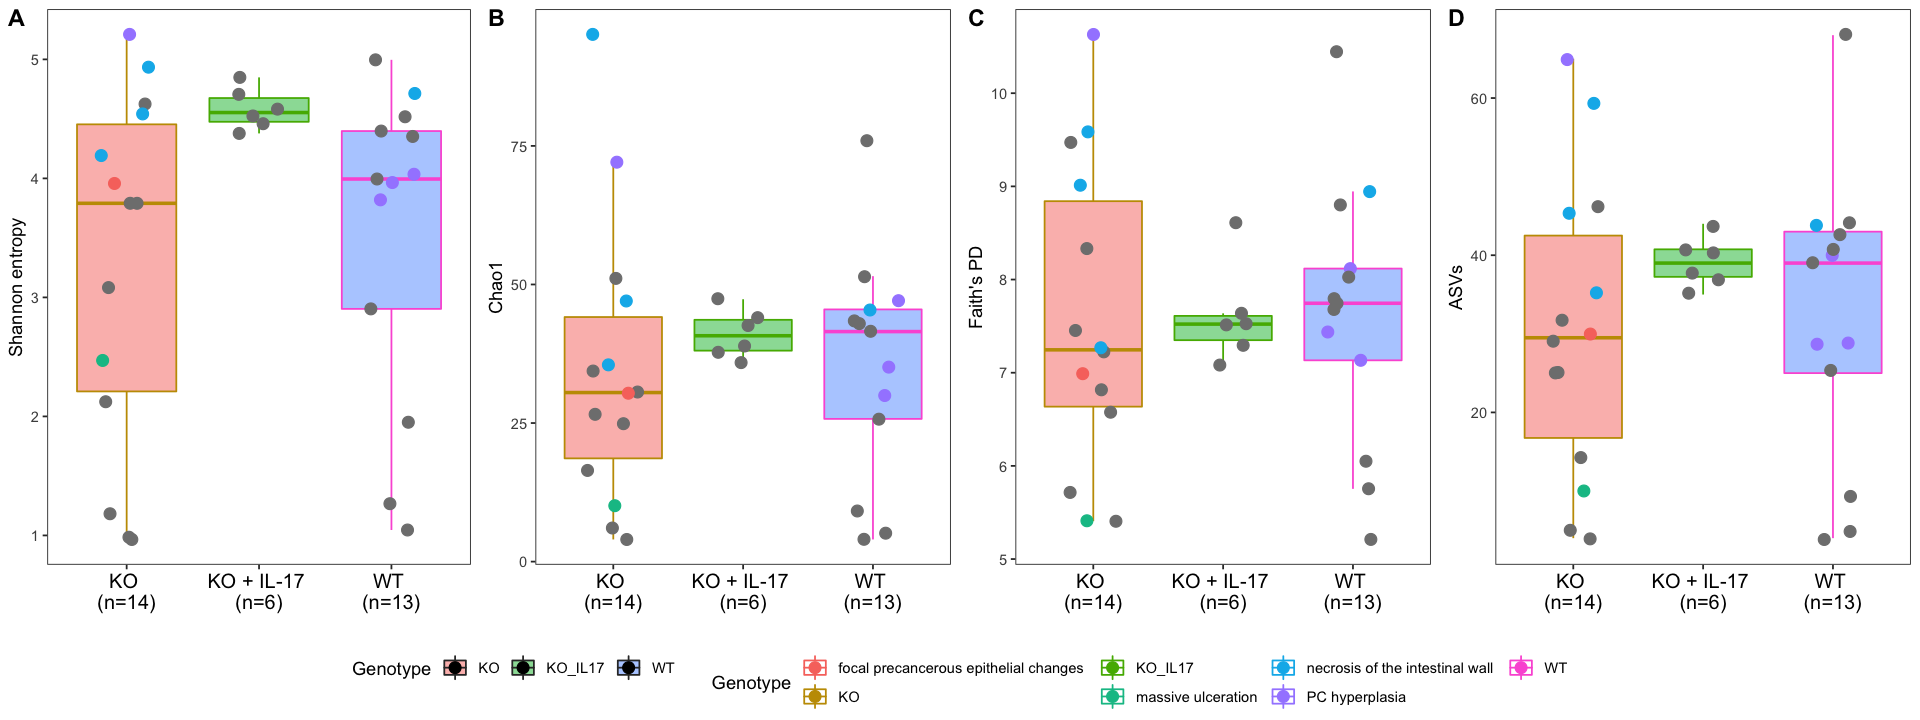

In [9]:
options(repr.plot.width=16, repr.plot.height=6)

# Shannon
plt_shannon <- ggplot(metadata_g3, aes(x=Genotype, y=shannon_entropy, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5) +
    geom_jitter(size=3, width=0.2, aes(colour=Notes2)) +
    labs(x="", y="Shannon entropy") +
    scale_x_discrete(labels=c("KO" = "KO \n(n=14)", "KO_IL17" = "KO + IL-17 \n(n=6)", "WT" = "WT \n(n=13)")) +
    theme_bw() +
    theme(panel.grid=element_blank(),legend.position="none",
          axis.text.x = element_text(size = 12, colour = "black"))
# Chao1
plt_chao1 <- ggplot(metadata_g3, aes(x=Genotype, y=chao1, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5, outlier.shape = NA) +
    geom_jitter(size=3, width=0.2, aes(colour=Notes2)) +
    labs(x="", y="Chao1") +
    scale_x_discrete(labels=c("KO" = "KO \n(n=14)", "KO_IL17" = "KO + IL-17 \n(n=6)", "WT" = "WT \n(n=13)")) +
    theme_bw() +
    theme(panel.grid=element_blank(), legend.position="none",
          axis.text.x = element_text(size = 12, colour = "black"))
# Faith PD
plt_faith <- ggplot(metadata_g3, aes(x=Genotype, y=faith_pd, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5, outlier.shape = NA) +
    geom_jitter(size=3, width=0.2, aes(colour=Notes2)) +
    labs(x="", y="Faith's PD") +
    scale_x_discrete(labels=c("KO" = "KO \n(n=14)", "KO_IL17" = "KO + IL-17 \n(n=6)", "WT" = "WT \n(n=13)")) +
    theme_bw() +
    theme(panel.grid=element_blank(), legend.position="none",
          axis.text.x = element_text(size = 12, colour = "black"))
# ASV
plt_asv <- ggplot(metadata_g3, aes(x=Genotype, y=observed_features, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5) +
    geom_jitter(size=3, width=0.2, aes(colour=Notes2)) +
    labs(x="", y="ASVs") +
    scale_x_discrete(labels=c("KO" = "KO \n(n=14)", "KO_IL17" = "KO + IL-17 \n(n=6)", "WT" = "WT \n(n=13)")) +
    theme_bw() +
    theme(panel.grid=element_blank(), legend.position="none",
          axis.text.x = element_text(size = 12, colour = "black"))

#combine plot from all donors
plt_alpha_genotype3 <- ggarrange(plt_shannon, plt_chao1, plt_faith, plt_asv, ncol=4, nrow=1, 
                                  labels = c('A', 'B', 'C', 'D'), common.legend = TRUE, legend="bottom")
plt_alpha_genotype3



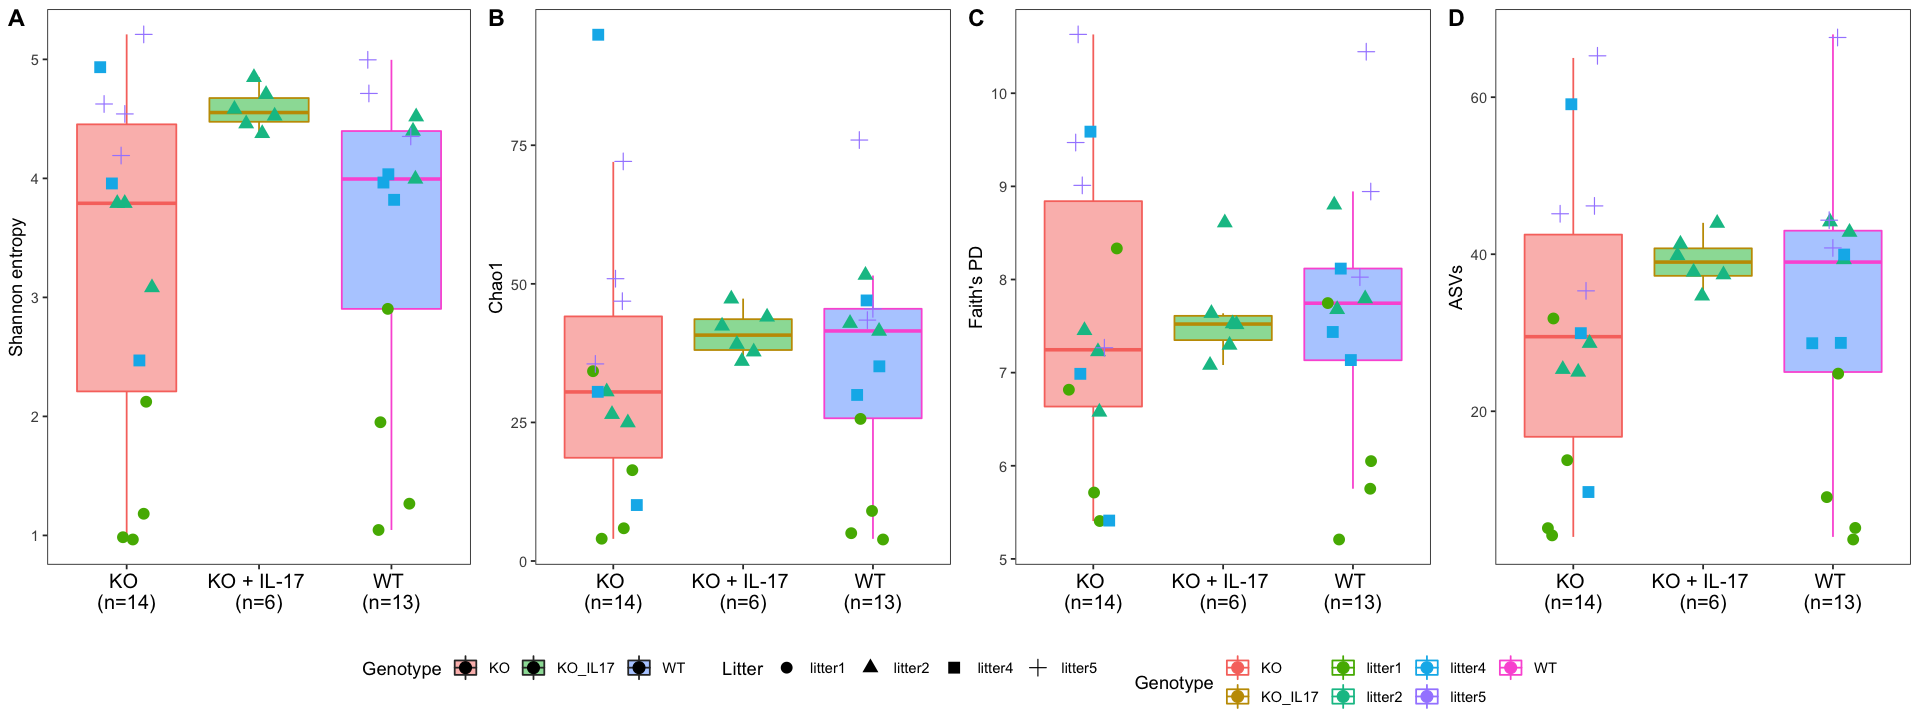

In [10]:
options(repr.plot.width=16, repr.plot.height=6)

# Shannon
plt_shannon <- ggplot(metadata_g3, aes(x=Genotype, y=shannon_entropy, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5) +
    geom_jitter(size=3, width=0.2, aes(colour=Litter, shape=Litter)) +
    labs(x="", y="Shannon entropy") +
    scale_x_discrete(labels=c("KO" = "KO \n(n=14)", "KO_IL17" = "KO + IL-17 \n(n=6)", "WT" = "WT \n(n=13)")) +
    theme_bw() +
    theme(panel.grid=element_blank(),legend.position="none",
          axis.text.x = element_text(size = 12, colour = "black"))
# Chao1
plt_chao1 <- ggplot(metadata_g3, aes(x=Genotype, y=chao1, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5, outlier.shape = NA) +
    geom_jitter(size=3, width=0.2, aes(colour=Litter, shape=Litter)) +
    labs(x="", y="Chao1") +
    scale_x_discrete(labels=c("KO" = "KO \n(n=14)", "KO_IL17" = "KO + IL-17 \n(n=6)", "WT" = "WT \n(n=13)")) +
    theme_bw() +
    theme(panel.grid=element_blank(), legend.position="none",
          axis.text.x = element_text(size = 12, colour = "black"))
# Faith PD
plt_faith <- ggplot(metadata_g3, aes(x=Genotype, y=faith_pd, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5, outlier.shape = NA) +
    geom_jitter(size=3, width=0.2, aes(colour=Litter, shape=Litter)) +
    labs(x="", y="Faith's PD") +
    scale_x_discrete(labels=c("KO" = "KO \n(n=14)", "KO_IL17" = "KO + IL-17 \n(n=6)", "WT" = "WT \n(n=13)")) +
    theme_bw() +
    theme(panel.grid=element_blank(), legend.position="none",
          axis.text.x = element_text(size = 12, colour = "black"))
# ASV
plt_asv <- ggplot(metadata_g3, aes(x=Genotype, y=observed_features, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5) +
    geom_jitter(size=3, width=0.2, aes(colour=Litter, shape=Litter)) +
    labs(x="", y="ASVs") +
    scale_x_discrete(labels=c("KO" = "KO \n(n=14)", "KO_IL17" = "KO + IL-17 \n(n=6)", "WT" = "WT \n(n=13)")) +
    theme_bw() +
    theme(panel.grid=element_blank(), legend.position="none",
          axis.text.x = element_text(size = 12, colour = "black"))

#combine plot from all donors
plt_alpha_genotype3 <- ggarrange(plt_shannon, plt_chao1, plt_faith, plt_asv, ncol=4, nrow=1, 
                                  labels = c('A', 'B', 'C', 'D'), common.legend = TRUE, legend="bottom")
plt_alpha_genotype3


We found no significant difference in alpha diversity between the genotypes even after controllong the litter effect by addition of random effects.<br>
*side note:<br>
Shannon entropy = accounts for richness and evenness<br>
ASV = amplicon sequence varians<br>
Chao1 = diversity estimator based on rare ASVs<br>
Faith's PD = phylogenetic diversity*

## Alpha diversity by litter groups

In [11]:
# subsample the dataset by litter
metadata_l1 <- filter(metadata_g3, Litter=="litter1")
metadata_l2 <- filter(metadata_g3, Litter=="litter2")
metadata_l4 <- filter(metadata_g3, Litter=="litter4")
metadata_l5 <- filter(metadata_g3, Litter=="litter5")

metadata_l2_wtko <- filter(metadata_g2a, Litter=='litter2')
metadata_l2_wtko17 <- filter(metadata_g2c, Litter=='litter2')
metadata_l2_koko17 <- filter(metadata_g2b, Litter=='litter2')

In [12]:
## test each litter group separately with Kruskal-Wallis test

# Shannon
kruskal_l1_sh <- kruskal.test(shannon_entropy ~ Genotype, data=metadata_l1)
kruskal_l2_sh <- kruskal.test(shannon_entropy ~ Genotype, data=metadata_l2)
kruskal_l4_sh <- kruskal.test(shannon_entropy ~ Genotype, data=metadata_l4)
kruskal_l5_sh <- kruskal.test(shannon_entropy ~ Genotype, data=metadata_l5)

message("Shannon pvals: \nlitter1, litter2, litter4, litter5")
kruskal_l1_sht<-do.call("rbind",kruskal_l1_sh)[c(4,1:3),]
kruskal_l2_sht<-do.call("rbind",kruskal_l2_sh)[c(4,1:3),]
kruskal_l4_sht<-do.call("rbind",kruskal_l4_sh)[c(4,1:3),]
kruskal_l5_sht<-do.call("rbind",kruskal_l5_sh)[c(4,1:3),]
pvals_kruskal_sh<-as.numeric()
pvals_kruskal_sh[1]<-kruskal_l1_sht[4]
pvals_kruskal_sh[2]<-kruskal_l2_sht[4]
pvals_kruskal_sh[3]<-kruskal_l4_sht[4]
pvals_kruskal_sh[4]<-kruskal_l5_sht[4]
print(pvals_kruskal_sh)

# Chao1
kruskal_l1_ch <- kruskal.test(chao1 ~ Genotype, data=metadata_l1)
kruskal_l2_ch <- kruskal.test(chao1 ~ Genotype, data=metadata_l2)
kruskal_l4_ch <- kruskal.test(chao1 ~ Genotype, data=metadata_l4)
kruskal_l5_ch <- kruskal.test(chao1 ~ Genotype, data=metadata_l5)

message("Chao1 pvals: \nlitter1, litter2, litter4, litter5")
kruskal_l1_cht<-do.call("rbind",kruskal_l1_ch)[c(4,1:3),]
kruskal_l2_cht<-do.call("rbind",kruskal_l2_ch)[c(4,1:3),]
kruskal_l4_cht<-do.call("rbind",kruskal_l4_ch)[c(4,1:3),]
kruskal_l5_cht<-do.call("rbind",kruskal_l5_ch)[c(4,1:3),]
pvals_kruskal_ch<-as.numeric()
pvals_kruskal_ch[1]<-kruskal_l1_cht[4]
pvals_kruskal_ch[2]<-kruskal_l2_cht[4]
pvals_kruskal_ch[3]<-kruskal_l4_cht[4]
pvals_kruskal_ch[4]<-kruskal_l5_cht[4]
print(pvals_kruskal_ch)

# Faith PD
kruskal_l1_fa <- kruskal.test(faith_pd ~ Genotype, data=metadata_l1)
kruskal_l2_fa <- kruskal.test(faith_pd ~ Genotype, data=metadata_l2)
kruskal_l4_fa <- kruskal.test(faith_pd ~ Genotype, data=metadata_l4)
kruskal_l5_fa <- kruskal.test(faith_pd ~ Genotype, data=metadata_l5)

# organize results
message("Faith PD pvals: \nlitter1, litter2, litter4, litter5")
kruskal_l1_fat<-do.call("rbind",kruskal_l1_fa)[c(4,1:3),]
kruskal_l2_fat<-do.call("rbind",kruskal_l2_fa)[c(4,1:3),]
kruskal_l4_fat<-do.call("rbind",kruskal_l4_fa)[c(4,1:3),]
kruskal_l5_fat<-do.call("rbind",kruskal_l5_fa)[c(4,1:3),]
pvals_kruskal_fa<-as.numeric()
pvals_kruskal_fa[1]<-kruskal_l1_fat[4]
pvals_kruskal_fa[2]<-kruskal_l2_fat[4]
pvals_kruskal_fa[3]<-kruskal_l4_fat[4]
pvals_kruskal_fa[4]<-kruskal_l5_fat[4]
print(pvals_kruskal_fa)

# ASVs
kruskal_l1_as <- kruskal.test(observed_features ~ Genotype, data=metadata_l1)
kruskal_l2_as <- kruskal.test(observed_features ~ Genotype, data=metadata_l2)
kruskal_l4_as <- kruskal.test(observed_features ~ Genotype, data=metadata_l4)
kruskal_l5_as <- kruskal.test(observed_features ~ Genotype, data=metadata_l5)

# organize results
message("ASV pvals: \nlitter1, litter2, litter4, litter5")
kruskal_l1_ast<-do.call("rbind",kruskal_l1_as)[c(4,1:3),]
kruskal_l2_ast<-do.call("rbind",kruskal_l2_as)[c(4,1:3),]
kruskal_l4_ast<-do.call("rbind",kruskal_l4_as)[c(4,1:3),]
kruskal_l5_ast<-do.call("rbind",kruskal_l5_as)[c(4,1:3),]
pvals_kruskal_as<-as.numeric()
pvals_kruskal_as[1]<-kruskal_l1_ast[4]
pvals_kruskal_as[2]<-kruskal_l2_ast[4]
pvals_kruskal_as[3]<-kruskal_l4_ast[4]
pvals_kruskal_as[4]<-kruskal_l5_ast[4]
print(pvals_kruskal_as)

Shannon pvals: 
litter1, litter2, litter4, litter5



[1] "0.248213078989924" "0.022199349159078" "0.827259346562712"
[4] "0.723673609831763"


Chao1 pvals: 
litter1, litter2, litter4, litter5



[1] "0.663117245320382"  "0.0326119359861164" "0.827259346562712" 
[4] "1"                 


Faith PD pvals: 
litter1, litter2, litter4, litter5



[1] "0.772829992684449"  "0.0443614417729066" "0.512690760261924" 
[4] "0.723673609831763" 


ASV pvals: 
litter1, litter2, litter4, litter5



[1] "0.770153318396921"  "0.0293198817041238" "0.824778095082514" 
[4] "1"                 


In [13]:
## test pairs
pairwise.wilcox.test(metadata_l2$shannon_entropy, metadata_l2$Genotype, p.adjust.method = "BH", paired=FALSE)
pairwise.wilcox.test(metadata_l2$chao1, metadata_l2$Genotype, p.adjust.method = "BH", paired=FALSE)
pairwise.wilcox.test(metadata_l2$faith_pd, metadata_l2$Genotype, p.adjust.method = "BH", paired=FALSE)
pairwise.wilcox.test(metadata_l2$observed_features, metadata_l2$Genotype, p.adjust.method = "BH", paired=FALSE)



	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  metadata_l2$shannon_entropy and metadata_l2$Genotype 

        KO    KO_IL17
KO_IL17 0.071 -      
WT      0.150 0.167  

P value adjustment method: BH 


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  metadata_l2$chao1 and metadata_l2$Genotype 

        KO    KO_IL17
KO_IL17 0.071 -      
WT      0.150 0.381  

P value adjustment method: BH 


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  metadata_l2$faith_pd and metadata_l2$Genotype 

        KO   KO_IL17
KO_IL17 0.17 -      
WT      0.15 0.15   

P value adjustment method: BH 

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  metadata_l2$observed_features and metadata_l2$Genotype 

        KO    KO_IL17
KO_IL17 0.083 -      
WT      0.115 0.300  

P value adjustment method: BH 

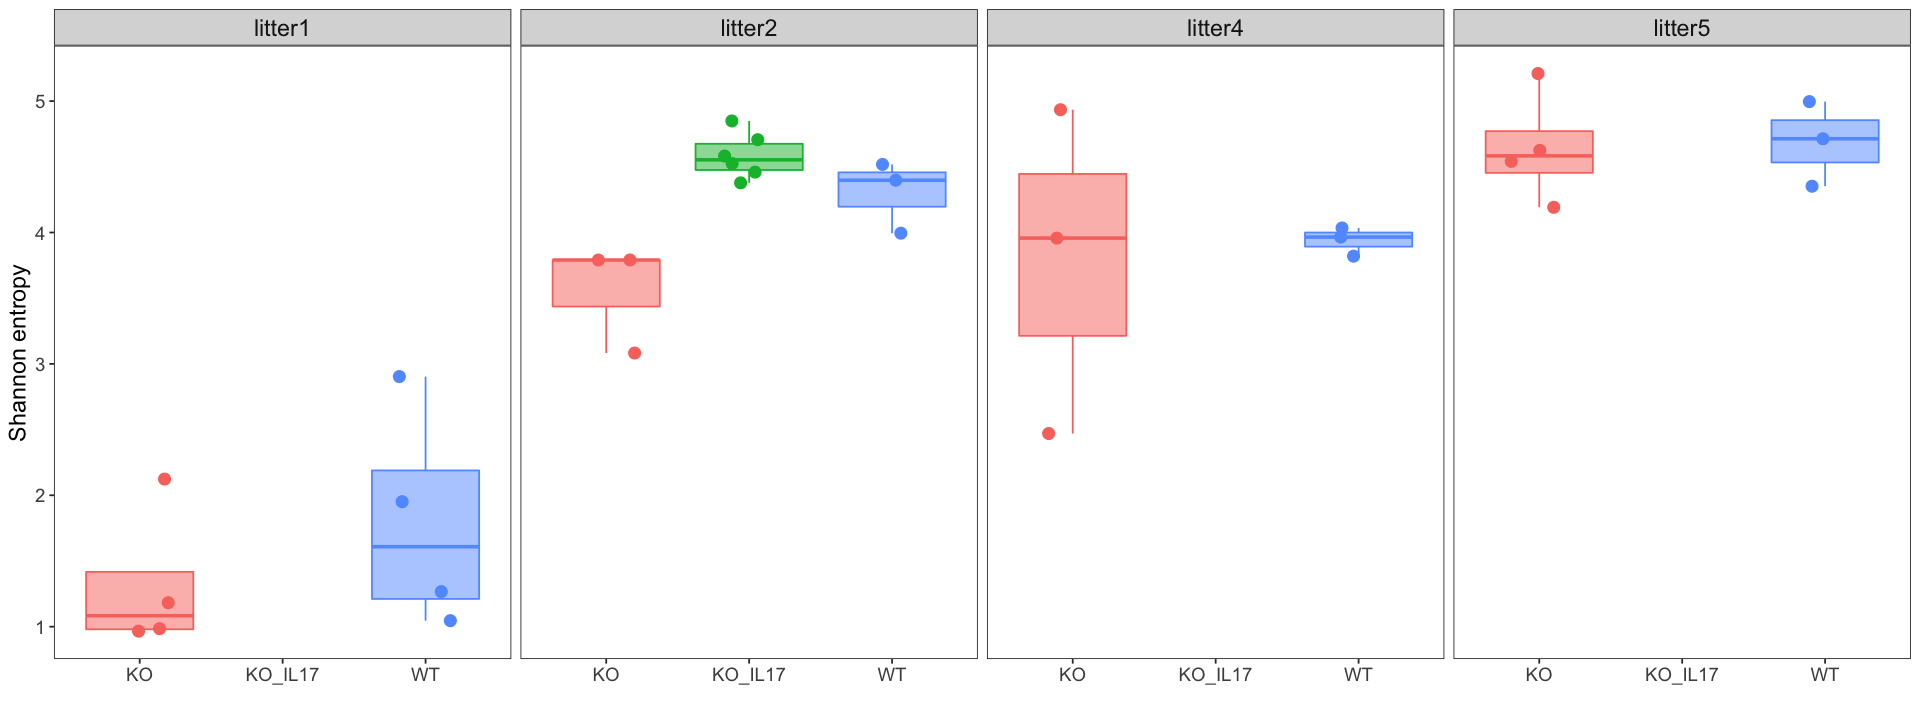

In [14]:
# Shannon diversity by litter groups
plt_shannon <- ggplot(metadata_g3, aes(x=Genotype, y=shannon_entropy, color=Genotype, fill=Genotype)) +
    geom_boxplot(alpha=0.5, outlier.shape = NA) +
    geom_jitter(size=3, width=0.2) +
    labs(x="", y="Shannon entropy") +
    theme_bw() +
    theme(panel.grid=element_blank(),legend.position="none",
          text=element_text(size=14, colour="black"),
          strip.text.x = element_text(size = 14)) +
   facet_grid(cols=vars(Litter))

plt_shannon

We found a significant difference in alpha diversity between the genotypes only in litter 2 group.

## Beta diversity

In [15]:
# load beta diversity WT vs KO
bray.2a <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/bray_curtis_distance_matrix_genotype2a.tsv", sep='\t')
jacc.2a <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/jaccard_distance_matrix_genotype2a.tsv", sep='\t')
uuni.2a <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/unweighted_unifrac_distance_matrix_genotype2a.tsv", sep='\t')
wuni.2a <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/weighted_unifrac_distance_matrix_genotype2a.tsv", sep='\t')

# load beta diversity KO vs KO+IL-17
bray.2b <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/bray_curtis_distance_matrix_genotype2b.tsv", sep='\t')
jacc.2b <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/jaccard_distance_matrix_genotype2b.tsv", sep='\t')
uuni.2b <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/unweighted_unifrac_distance_matrix_genotype2b.tsv", sep='\t')
wuni.2b <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/weighted_unifrac_distance_matrix_genotype2b.tsv", sep='\t')

# load beta diversity WT vs KO+IL-17
bray.2c <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/bray_curtis_distance_matrix_genotype2c.tsv", sep='\t')
jacc.2c <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/jaccard_distance_matrix_genotype2c.tsv", sep='\t')
uuni.2c <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/unweighted_unifrac_distance_matrix_genotype2c.tsv", sep='\t')
wuni.2c <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192/beta/weighted_unifrac_distance_matrix_genotype2c.tsv", sep='\t')

# load PCoA coordinates
bray.pca <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_donors_excluded/beta/bray_curtis_pca_exported.tsv", sep='\t')
jacc.pca <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_donors_excluded/beta/jaccard_pca_exported.tsv", sep='\t')
uuni.pca <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_donors_excluded/beta/unweighted_unifrac_pca_exported.tsv", sep='\t')
wuni.pca <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_donors_excluded/beta/weighted_unifrac_pca_exported.tsv", sep='\t')

# merge PCoA coordinates with metadata
bray.pca <- merge(bray.pca,metadata, by = c("SampleID"))
jacc.pca <- merge(jacc.pca,metadata, by = c("SampleID"))
uuni.pca <- merge(uuni.pca,metadata, by = c("SampleID"))
wuni.pca <- merge(wuni.pca,metadata, by = c("SampleID"))


In [16]:
# convert to distance matrix
TO_DIST<-function(x){
  x<-x[,2:ncol(x)]
  rownames(x)<-colnames(x)
  x<-as.matrix(x)
  as.dist(x)
}

bray.2a.dist<-TO_DIST(bray.2a)
jacc.2a.dist<-TO_DIST(jacc.2a)
uuni.2a.dist<-TO_DIST(uuni.2a)
wuni.2a.dist<-TO_DIST(wuni.2a)

bray.2b.dist<-TO_DIST(bray.2b)
jacc.2b.dist<-TO_DIST(jacc.2b)
uuni.2b.dist<-TO_DIST(uuni.2b)
wuni.2b.dist<-TO_DIST(wuni.2b)

bray.2c.dist<-TO_DIST(bray.2c)
jacc.2c.dist<-TO_DIST(jacc.2c)
uuni.2c.dist<-TO_DIST(uuni.2c)
wuni.2c.dist<-TO_DIST(wuni.2c)

In [17]:
# MDMR models for WT vs KO
meta.ordered<-metadata_g2a[match(attributes(bray.2a.dist)$Labels, metadata_g2a$Label2),]

mdmr.res.bray.2a <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=bray.2a.dist)
print(mdmr.res.bray.2a)
mdmr.res.jacc.2a <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=jacc.2a.dist)
print(mdmr.res.jacc.2a)
mdmr.res.uuni.2a <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=uuni.2a.dist)
print(mdmr.res.uuni.2a)
mdmr.res.wuni.2a <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=wuni.2a.dist)
print(mdmr.res.wuni.2a)

              p-value
Omnibus     0.0084187
(Intercept)   0.96548
Genotype    0.0040702
            p-value
Omnibus     0.47311
(Intercept) 0.99634
Genotype    0.39474
            p-value
Omnibus     0.62821
(Intercept) 0.99946
Genotype    0.61938
             p-value
Omnibus     0.079716
(Intercept)  0.81129
Genotype    0.067201


In [18]:
# MDMR models for KO vs KO+IL-17
meta.ordered<-metadata_g2b[match(attributes(bray.2b.dist)$Labels, metadata_g2b$Label2),]

mdmr.res.bray.2b <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=bray.2b.dist)
print(mdmr.res.bray.2b)
mdmr.res.jacc.2b <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=jacc.2b.dist)
print(mdmr.res.jacc.2b)
mdmr.res.uuni.2b <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=uuni.2b.dist)
print(mdmr.res.uuni.2b)
mdmr.res.wuni.2b <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=wuni.2b.dist)
print(mdmr.res.wuni.2b)

               p-value
Omnibus     6.1542e-09
(Intercept)    0.91774
Genotype       < 1e-20
               p-value
Omnibus     7.2766e-11
(Intercept)    0.96807
Genotype       < 1e-18
            p-value
Omnibus     0.21912
(Intercept) 0.90363
Genotype    0.18425
              p-value
Omnibus      0.025791
(Intercept)   0.84771
Genotype    0.0058049


In [19]:
# MDMR models for WT vs KO+IL-17
meta.ordered<-metadata_g2c[match(attributes(bray.2c.dist)$Labels, metadata_g2c$Label2),]

mdmr.res.bray.2c <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=bray.2c.dist)
print(mdmr.res.bray.2c)
mdmr.res.jacc.2c <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=jacc.2c.dist)
print(mdmr.res.jacc.2c)
mdmr.res.uuni.2c <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=uuni.2c.dist)
print(mdmr.res.uuni.2c)
mdmr.res.wuni.2c <- MDMR::mixed.mdmr(~Genotype+(1|Litter), data=meta.ordered, D=wuni.2c.dist)
print(mdmr.res.wuni.2c)

               p-value
Omnibus     8.8498e-06
(Intercept)    0.11028
Genotype    2.6865e-10
               p-value
Omnibus     0.00034384
(Intercept)    0.12327
Genotype    1.2386e-06
            p-value
Omnibus     0.64445
(Intercept) 0.62281
Genotype    0.32178
            p-value
Omnibus     0.81707
(Intercept) 0.83971
Genotype    0.79304


In [20]:
# tabulate the model results
mdmr.res.bray.2at<-do.call("rbind",mdmr.res.bray.2a)[c(4,1:2),]
mdmr.res.jacc.2at<-do.call("rbind",mdmr.res.jacc.2a)[c(4,1:2),]
mdmr.res.uuni.2at<-do.call("rbind",mdmr.res.uuni.2a)[c(4,1:2),]
mdmr.res.wuni.2at<-do.call("rbind",mdmr.res.wuni.2a)[c(4,1:2),]

mdmr.res.bray.2bt<-do.call("rbind",mdmr.res.bray.2b)[c(4,1:2),]
mdmr.res.jacc.2bt<-do.call("rbind",mdmr.res.jacc.2b)[c(4,1:2),]
mdmr.res.uuni.2bt<-do.call("rbind",mdmr.res.uuni.2b)[c(4,1:2),]
mdmr.res.wuni.2bt<-do.call("rbind",mdmr.res.wuni.2b)[c(4,1:2),]

mdmr.res.bray.2ct<-do.call("rbind",mdmr.res.bray.2c)[c(4,1:2),]
mdmr.res.jacc.2ct<-do.call("rbind",mdmr.res.jacc.2c)[c(4,1:2),]
mdmr.res.uuni.2ct<-do.call("rbind",mdmr.res.uuni.2c)[c(4,1:2),]
mdmr.res.wuni.2ct<-do.call("rbind",mdmr.res.wuni.2c)[c(4,1:2),]

In [21]:
# adjust p values for Bray-Curtis
message("Bray-Curtis pvals and FDR for 3 comparisons WT vs KO vs KO+IL-17")
pvals_bray<-as.numeric()

pvals_bray[1]<-mdmr.res.bray.2at[c(3),3]
pvals_bray[2]<-mdmr.res.bray.2bt[c(3),3]
pvals_bray[3]<-mdmr.res.bray.2ct[c(3),3]
print(pvals_bray)

fdr_bray<-p.adjust(pvals_bray,"fdr")
print(fdr_bray)

# adjust p values for Jaccard
message("Jaccard pvals and FDR for 3 comparisons WT vs KO, KO vs KO+IL-17, WT vs KO+IL-17")
pvals_jacc<-as.numeric()

pvals_jacc[1]<-mdmr.res.jacc.2at[c(3),3]
pvals_jacc[2]<-mdmr.res.jacc.2bt[c(3),3]
pvals_jacc[3]<-mdmr.res.jacc.2ct[c(3),3]
print(pvals_jacc)

fdr_jacc<-p.adjust(pvals_jacc,"fdr")
print(fdr_jacc)

# adjust p values for unweighted UniFrac
message("unweighted UniFrac pvals and FDR for 3 comparisons WT vs KO, KO vs KO+IL-17, WT vs KO+IL-17")
pvals_uuni<-as.numeric()

pvals_uuni[1]<-mdmr.res.uuni.2at[c(3),3]
pvals_uuni[2]<-mdmr.res.uuni.2bt[c(3),3]
pvals_uuni[3]<-mdmr.res.uuni.2ct[c(3),3]
print(pvals_uuni)

fdr_uuni<-p.adjust(pvals_uuni,"fdr")
print(fdr_uuni)

# adjust p values for weighted UniFrac
message("weighted UniFrac pvals and FDR for 3 comparisons WT vs KO, KO vs KO+IL-17, WT vs KO+IL-17")
pvals_wuni<-as.numeric()

pvals_wuni[1]<-mdmr.res.wuni.2at[c(3),3]
pvals_wuni[2]<-mdmr.res.wuni.2bt[c(3),3]
pvals_wuni[3]<-mdmr.res.wuni.2ct[c(3),3]
print(pvals_wuni)

fdr_wuni<-p.adjust(pvals_wuni,"fdr")
print(fdr_wuni)

Bray-Curtis pvals and FDR for 3 comparisons WT vs KO vs KO+IL-17



[1] 4.070215e-03 0.000000e+00 2.686491e-10
[1] 4.070215e-03 0.000000e+00 4.029737e-10


Jaccard pvals and FDR for 3 comparisons WT vs KO, KO vs KO+IL-17, WT vs KO+IL-17



[1] 3.947442e-01 0.000000e+00 1.238570e-06
[1] 3.947442e-01 0.000000e+00 1.857854e-06


unweighted UniFrac pvals and FDR for 3 comparisons WT vs KO, KO vs KO+IL-17, WT vs KO+IL-17



[1] 0.6193798 0.1842514 0.3217799
[1] 0.6193798 0.4826698 0.4826698


weighted UniFrac pvals and FDR for 3 comparisons WT vs KO, KO vs KO+IL-17, WT vs KO+IL-17



[1] 0.067201283 0.005804906 0.793036290
[1] 0.10080192 0.01741472 0.79303629


The MDMR models show significant difference in the ordination space between all 3 genotype groups, using Bray-Curtis metrics suggestnig there is a difference in microbiome of these genotypes when taking abundance but not phylogeny into account.

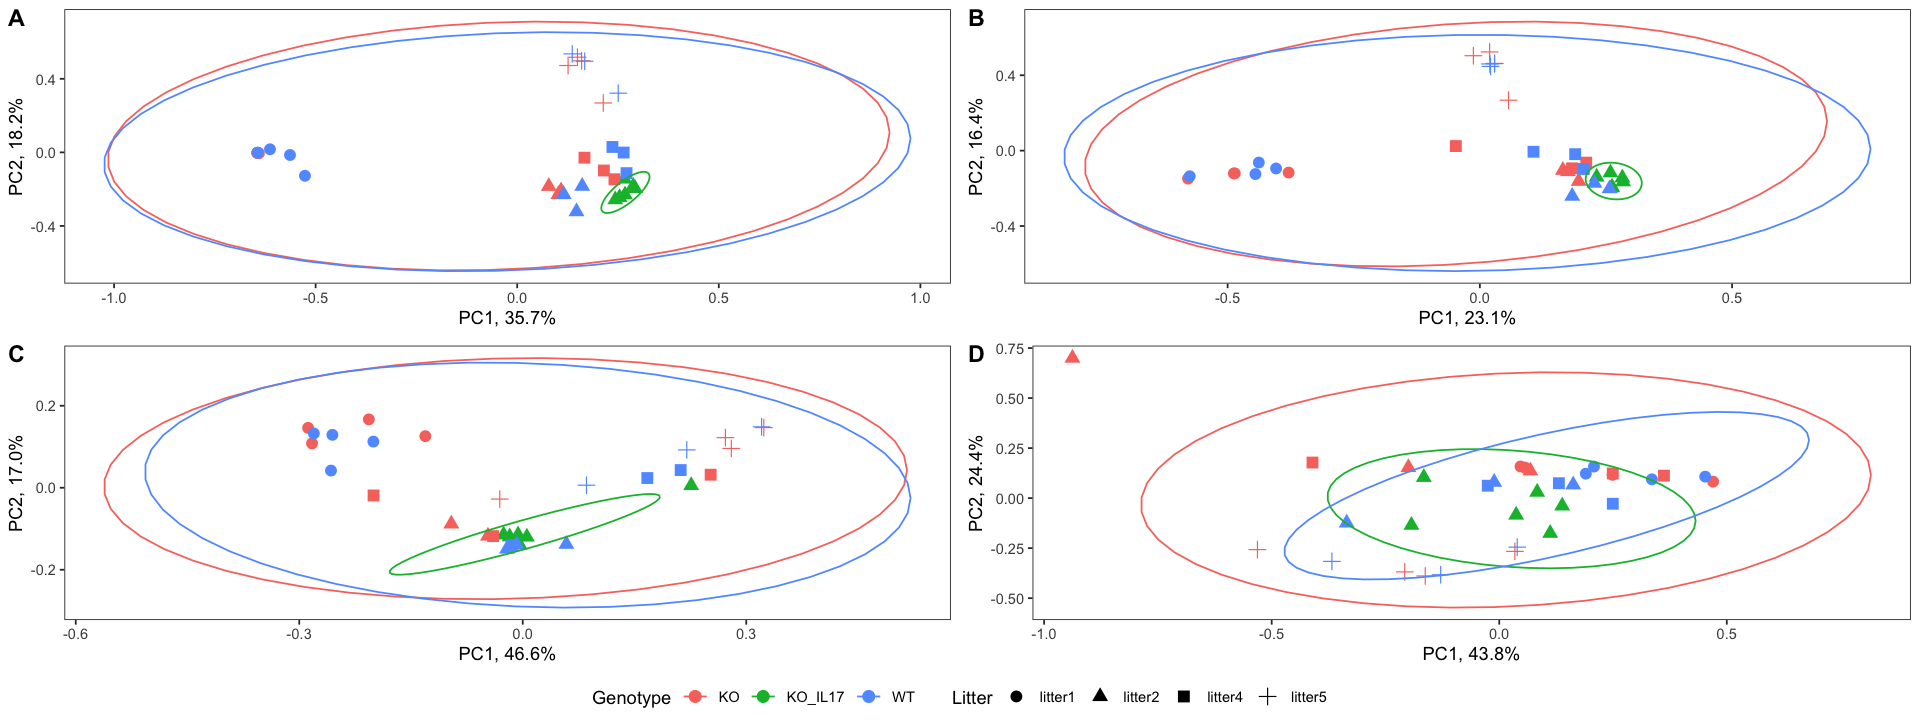

In [22]:
#options(repr.plot.width=18, repr.plot.height=10)

# Bray-Curtis
plt_bray <- ggplot(bray.pca, aes(x=PC1, y=PC2, color=Genotype)) +
    geom_point(size=3, aes(shape=Litter)) +
    stat_ellipse() +
    labs(x="PC1, 35.7%", y="PC2, 18.2%") +
    theme_bw() +
    theme(panel.grid=element_blank())

# Jaccard
plt_jacc <- ggplot(jacc.pca, aes(x=PC1, y=PC2, color=Genotype)) +
    geom_point(size=3, aes(shape=Litter)) +
    stat_ellipse() +
    labs(x="PC1, 23.1%", y="PC2, 16.4%") +
    theme_bw() +
    theme(panel.grid=element_blank())

# unweighted UniFrac
plt_uuni <- ggplot(uuni.pca, aes(x=PC1, y=PC2, color=Genotype)) +
    geom_point(size=3, aes(shape=Litter)) +
    stat_ellipse() +
    labs(x="PC1, 46.6%", y="PC2, 17.0%") +
    theme_bw() +
    theme(panel.grid=element_blank())

# weighted UniFrac
plt_wuni <- ggplot(wuni.pca, aes(x=PC1, y=PC2, color=Genotype)) +
    geom_point(size=3, aes(shape=Litter)) +
    stat_ellipse() +
    labs(x="PC1, 43.8%", y="PC2, 24.4%") +
    theme_bw() +
    theme(panel.grid=element_blank())

#combine plot from all donors
plt_pcoa <- ggarrange(plt_bray, plt_jacc, plt_uuni, plt_wuni, ncol=2, nrow=2, 
                                  labels = c('A', 'B', 'C', 'D'), common.legend = TRUE, legend="bottom")
plt_pcoa


Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”
Warning message in MASS::cov.trob(data[, vars]):
“Probable convergence failure”


pdf 
  2

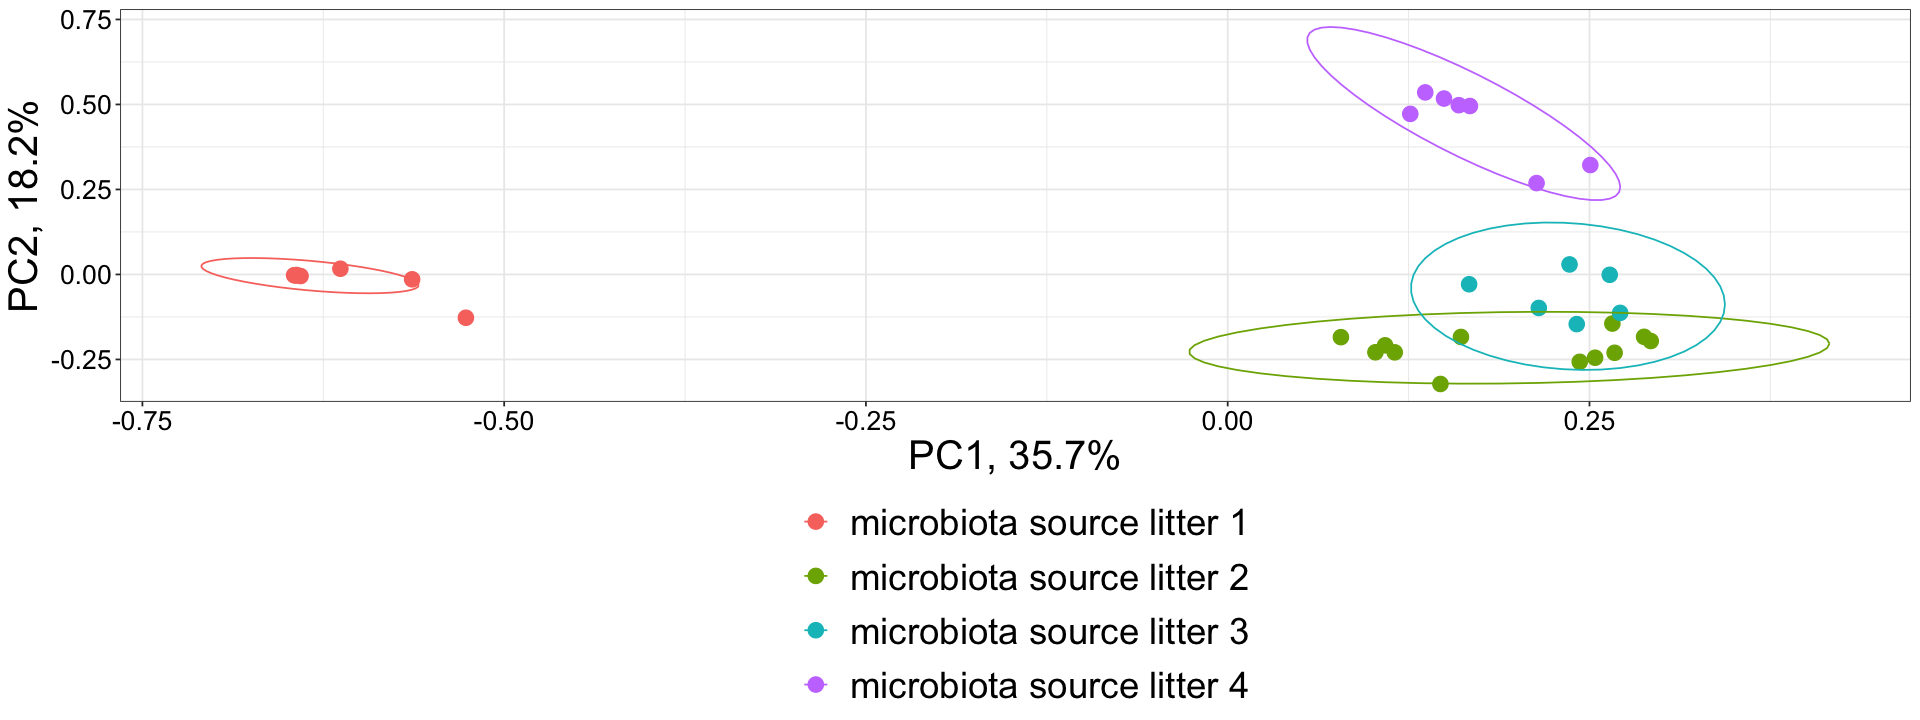

In [23]:
bray.pca[bray.pca == "litter1"] <- "microbiota source litter 1"
bray.pca[bray.pca == "litter2"] <- "microbiota source litter 2"
bray.pca[bray.pca == "litter4"] <- "microbiota source litter 3"
bray.pca[bray.pca == "litter5"] <- "microbiota source litter 4"

# Bray-Curtis PCoA all litter groups
plt_bray_all <- ggplot(bray.pca, aes(x=PC1, y=PC2, color=Litter)) +
    geom_point(size=4) +
    stat_ellipse() +
    labs(x="PC1, 35.7%", y="PC2, 18.2%", color="") +
    theme_bw() +
    theme(axis.text = element_text(size = 16, colour = "black"),
          axis.title = element_text(size = 24, colour = "black"),
          legend.text = element_text(size = 22, colour = "black"),
          legend.title = element_text(size = 24, colour = "black"),
          legend.position = "bottom", legend.box="vertical") +
    guides(col = guide_legend(nrow = 4, byrow = TRUE))
plt_bray_all

png(filename = "/Users/dagmarschierova/MEGA/IMG/study_5_revisions/Figures/bray_pca_all.png", 
    res=300, width=3000, height=2500, bg="transparent")
plot(plt_bray_all)
dev.off()

## Beta diversity by litter groups

Výsledky jsou v qiimu2, zde nebylo za potřebí dělat složitější modely, když jsme analyzovali každý vrh zvlášť. Udělala jsem akorát grafy PCoA, kde jsou navíc ty konfidenční elipsoidy, ale bohužel pokud máme méně než 3 body, elipsoid se nezobrazí :(

In [24]:
# load Bray-Curtis diversity for litter groups separately
bray.pca.l1 <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_litter1/beta/bray_curtis_pca_exported.tsv", sep='\t')
bray.pca.l2 <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_litter2/beta/bray_curtis_pca_exported.tsv", sep='\t')
bray.pca.l4 <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_litter4/beta/bray_curtis_pca_exported.tsv", sep='\t')
bray.pca.l5 <- read.delim("/Users/dagmarschierova/MEGA/IMG/study_5_revisions/qiime2_results/diversity_raref_1192_litter5/beta/bray_curtis_pca_exported.tsv", sep='\t')

# merge PCoA coordinates with metadata
bray.pca.l1 <- merge(bray.pca.l1,metadata, by = c("SampleID"))
bray.pca.l2 <- merge(bray.pca.l2,metadata, by = c("SampleID"))
bray.pca.l4 <- merge(bray.pca.l4,metadata, by = c("SampleID"))
bray.pca.l5 <- merge(bray.pca.l5,metadata, by = c("SampleID"))


pdf 
  2

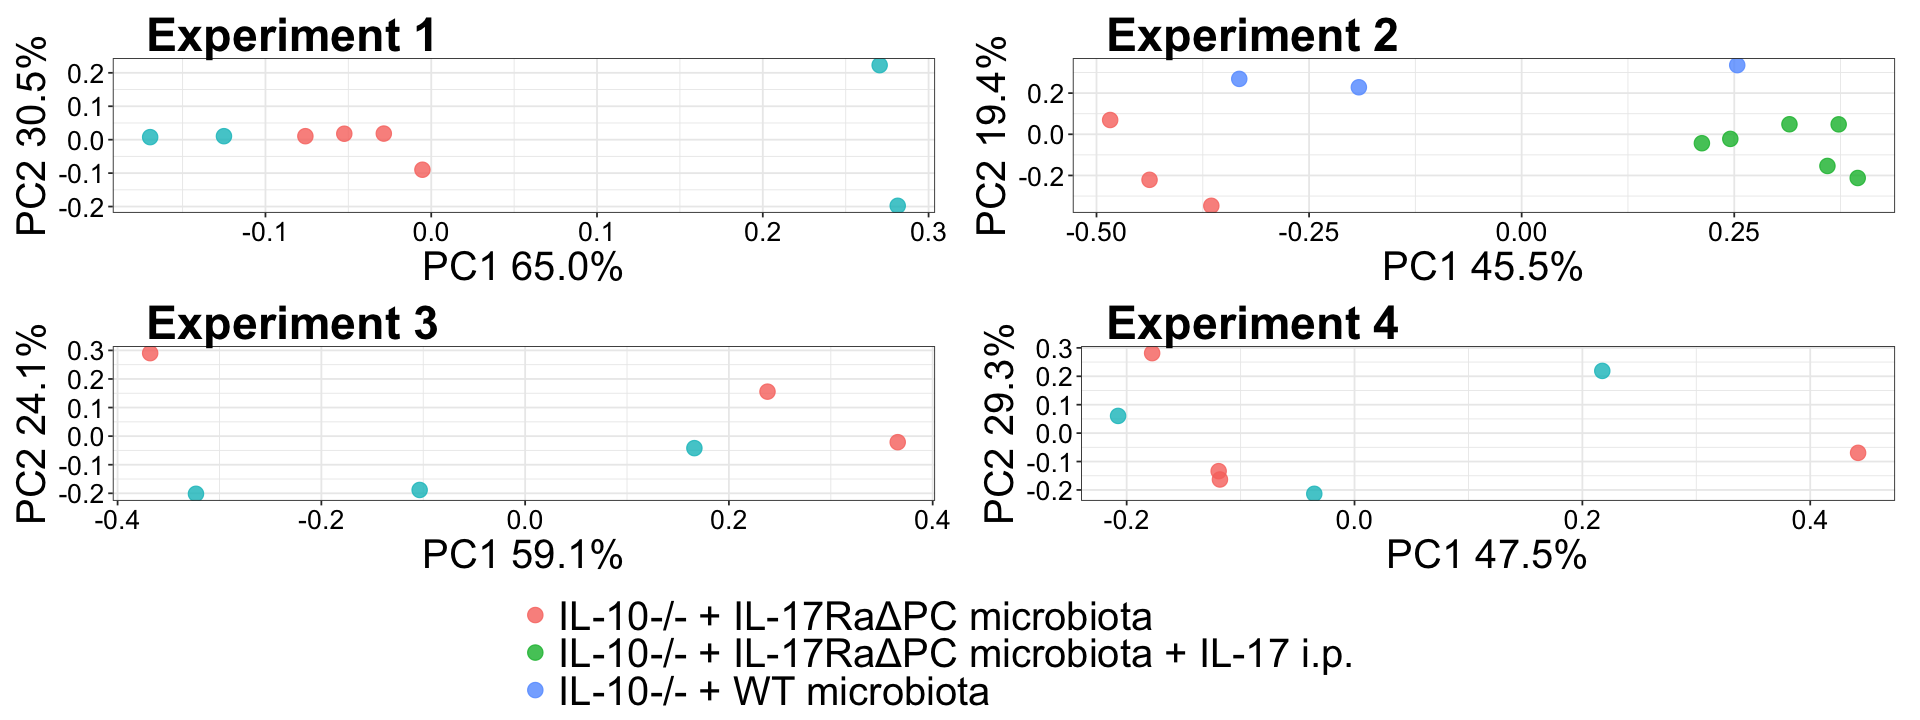

In [25]:
bray.pca.l2[bray.pca.l2 == "WT"] <- "IL-10-/- + WT microbiota"
bray.pca.l2[bray.pca.l2 == "KO"] <- "IL-10-/- + IL-17RaΔPC microbiota"
bray.pca.l2[bray.pca.l2 == "KO_IL17"] <- "IL-10-/- + IL-17RaΔPC microbiota + IL-17 i.p."

options(warn=-1)
# litter 1
plt_bray_l1 <- ggplot(bray.pca.l1, aes(x=PC1, y=PC2, color=Genotype)) +
    geom_jitter(size=4, width=0.090, alpha=0.8) +
    labs(x="PC1 65.0%", y="PC2 30.5%") +
    theme_bw() +
    theme(axis.text = element_text(size = 16, colour = "black"),
          axis.title = element_text(size = 24, colour = "black"),
          legend.text = element_text(size = 24, colour = "black"),
          legend.title = element_blank(),
          plot.margin = margin(t=35, l=10, r=15))

# litter 2
plt_bray_l2 <- ggplot(bray.pca.l2, aes(x=PC1, y=PC2, color=Genotype)) +
    geom_jitter(size=4, width=0.090, alpha=0.8) +
    labs(x="PC1 45.5%", y="PC2 19.4%") +
    theme_bw() +
    theme(axis.text = element_text(size = 16, colour = "black"),
          axis.title = element_text(size = 24, colour = "black"),
          legend.text = element_text(size = 24, colour = "black"),
          legend.title = element_blank(),
          plot.margin = margin(t=35, l=10, r=15))

# litter 4
plt_bray_l4 <- ggplot(bray.pca.l4, aes(x=PC1, y=PC2, color=Genotype)) +
    geom_jitter(size=4, alpha=0.8) +
    labs(x="PC1 59.1%", y="PC2 24.1%") +
    theme_bw() +
    theme(axis.text = element_text(size = 16, colour = "black"),
          axis.title = element_text(size = 24, colour = "black"),
          legend.text = element_text(size = 24, colour = "black"),
          legend.title = element_blank(),
          plot.margin = margin(t=35, l=10, r=15))

# litter 5
plt_bray_l5 <- ggplot(bray.pca.l5, aes(x=PC1, y=PC2, color=Genotype)) +
    geom_jitter(size=4, alpha=0.8) +
    labs(x="PC1 47.5%", y="PC2 29.3%") +
    theme_bw() +
    theme(axis.text = element_text(size = 16, colour = "black"),
          axis.title = element_text(size = 24, colour = "black"),
          legend.text = element_text(size = 24, colour = "black"),
          legend.title = element_blank(),
          plot.margin = margin(t=35, l=15, r=15))

# combine plot from all donors
plt_pcoa_litter <- plot_grid(plt_bray_l1 + theme(legend.position="none"),
                             plt_bray_l2 + theme(legend.position="none"),
                             plt_bray_l4 + theme(legend.position="none"),
                             plt_bray_l5 + theme(legend.position="none"),
                             label_size=28,
                             labels=c("Experiment 1", "Experiment 2", "Experiment 3", "Experiment 4"),
                             nrow=2, ncol=2)
legend_l2 <- get_legend(plt_bray_l2)
plt_pcoa_litter <- plot_grid(plt_pcoa_litter, legend_l2, ncol = 1, rel_heights = c(1, 0.25))
plt_pcoa_litter

# save plot
png(filename = "/Users/dagmarschierova/MEGA/IMG/study_5_revisions/Figures/bray_pca_litter.png", 
    res=300, width=3000, height=2500, bg="transparent")
plot(plt_pcoa_litter)
dev.off()
options(warn=0)